In [1]:
# Imports
from sklearn.svm import LinearSVC
from scipy.special import erf
import numpy as np
import pylab

import nest

In [2]:
# Create a neuron and get its status
neuron = nest.Create("iaf_psc_alpha")
nest.GetStatus(neuron)

({&#39;archiver_length&#39;: 0,
  &#39;beta_Ca&#39;: 0.001,
  &#39;C_m&#39;: 250.0,
  &#39;Ca&#39;: 0.0,
  &#39;E_L&#39;: -70.0,
  &#39;element_type&#39;: &lt;SLILiteral: neuron&gt;,
  &#39;frozen&#39;: False,
  &#39;global_id&#39;: 1,
  &#39;I_e&#39;: 0.0,
  &#39;local&#39;: True,
  &#39;local_id&#39;: 1,
  &#39;model&#39;: &lt;SLILiteral: iaf_psc_alpha&gt;,
  &#39;node_uses_wfr&#39;: False,
  &#39;parent&#39;: 0,
  &#39;post_trace&#39;: 0.0,
  &#39;recordables&#39;: (&lt;SLILiteral: I_syn_ex&gt;,
   &lt;SLILiteral: I_syn_in&gt;,
   &lt;SLILiteral: V_m&gt;,
   &lt;SLILiteral: weighted_spikes_ex&gt;,
   &lt;SLILiteral: weighted_spikes_in&gt;),
  &#39;supports_precise_spikes&#39;: False,
  &#39;synaptic_elements&#39;: {},
  &#39;t_ref&#39;: 2.0,
  &#39;t_spike&#39;: -1.0,
  &#39;tau_Ca&#39;: 10000.0,
  &#39;tau_m&#39;: 10.0,
  &#39;tau_minus&#39;: 20.0,
  &#39;tau_minus_triplet&#39;: 110.0,
  &#39;tau_syn_ex&#39;: 2.0,
  &#39;tau_syn_in&#39;: 2.0,
  &#39;thread&#39;: 0,
  &#39;thread_lo

In [3]:
# Change the neuron's parameter value
nest.SetStatus(neuron, {"I_e": 376.0})
nest.GetStatus(neuron, 'I_e')

(376.0,)

In [4]:
# Generate analysis apparatus
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

# Create connections with apparatus
nest.Connect(multimeter, neuron)
nest.Connect(neuron, spikedetector)

# Simulate
nest.Simulate(1000.0)

# Get simulation data
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

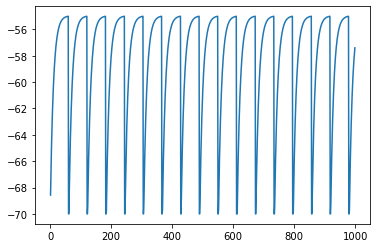

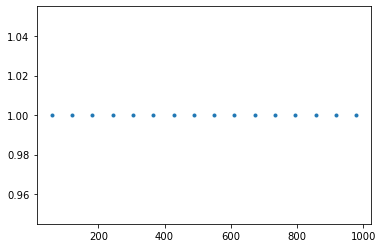

In [5]:
# Plot analysis
pylab.figure(1)
pylab.plot(ts, Vms)

dSD = nest.GetStatus(spikedetector,keys="events")[0]
evs = dSD["senders"]
ts = dSD["times"]
pylab.figure(2)
pylab.plot(ts, evs, ".")
pylab.show()

In [6]:
# Two unconnected neurons simulation
from sklearn.svm import LinearSVC
from scipy.special import erf
import pylab

import nest

# Create neurons
neuron = nest.Create("iaf_psc_alpha")
neuron2 = nest.Create("iaf_psc_alpha")
neuron3 = nest.Create("iaf_psc_alpha")

# Change neurons' parameters
nest.SetStatus(neuron, {"I_e": 376.0})
nest.SetStatus(neuron2, {"I_e": 370.0})
nest.SetStatus(neuron3, {"I_e": 10.0})

# Generate analysis apparatus
multimeter = nest.Create("multimeter")
nest.SetStatus(multimeter, {"withtime":True, "record_from":["V_m"]})
spikedetector = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

# Make Connections
nest.Connect(multimeter, neuron)
nest.Connect(multimeter, neuron2)
nest.Connect(multimeter, neuron3)
nest.Connect(neuron, spikedetector)

# Simulate
nest.Simulate(1000.0)

# Get simulation data from the multimeter
dmm = nest.GetStatus(multimeter)[0]
Vms = dmm["events"]["V_m"]
ts = dmm["events"]["times"]

[&lt;matplotlib.lines.Line2D at 0x7fd47948e700&gt;]

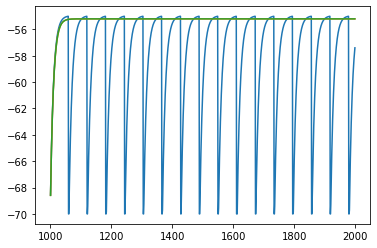

In [7]:
# Generate plots
pylab.figure(2)
Vms1 = dmm["events"]["V_m"][::3] # start at index 0: till the end: each second entry
ts1 = dmm["events"]["times"][::3]
pylab.plot(ts1, Vms1)
Vms2 = dmm["events"]["V_m"][1::3] # start at index 1: till the end: each second entry
ts2 = dmm["events"]["times"][1::3]
pylab.plot(ts2, Vms2)
Vms3 = dmm["events"]["V_m"][2::3] # start at index 1: till the end: each second entry
ts3 = dmm["events"]["times"][2::3]
pylab.plot(ts2, Vms2)